In [1]:
# Install packages #
# !pip install numpy
# !pip install matplotlib
# !pip install torch
# !pip install xlrd
# !pip install pandas

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import nn
from torch.utils.data import TensorDataset

In [3]:
# Loading training data
dataset = pd.read_csv("bmi_train.csv")
dataset.replace({'Gender': {'Female': 0, 'Male': 1}}, inplace=True) #Gender -> boolean
dataset = dataset.to_numpy()

# Splitting off 80% of data for training, 20% for validation
train_split = int(0.8 * len(dataset))
X_train = dataset[:train_split, [0,1,2]]
y_train = dataset[:train_split, 3]
X_test = dataset[train_split:, [0,1,2]]
y_test = dataset[train_split:, 3]

# Loading prediction data
prediction_dataset = pd.read_csv("bmi_validation.csv")
prediction_dataset.replace({'Gender': {'Female': 0, 'Male': 1}}, inplace=True) #Gender -> boolean
X_prediction = prediction_dataset.to_numpy()

# Normalize data set
X_train_normalized = (X_train - X_train.min(0)) / (X_train.max(0) - X_train.min(0))
X_test_normalized = (X_test - X_test.min(0)) / (X_test.max(0) - X_test.min(0))
X_prediction_normalized = (X_prediction - X_prediction.min(0)) / (X_prediction.max(0) - X_prediction.min(0))

# Turn data to tensor
X_train_tensor = torch.from_numpy(X_train_normalized)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test_normalized)
y_test_tensor = torch.from_numpy(y_test)
X_prediction_tensor = torch.from_numpy(X_prediction_normalized)

In [4]:
# Train and test error rate analysis function
def calculate_error_rate(X, y, w, b):
    num_samples = X.shape[0]
    y_pred = np.dot(X, w) + b
    error = y_pred - y
    squared_error = np.square(error)
    mean_squared_error = np.mean(squared_error)
    error_rate = np.sqrt(mean_squared_error)
    return error_rate

Custom SGD

Learned parameters:
w0 = 0.060808857709234714
w1 = -2.1334616790571426
w2 = 3.847422443386162
b = 2.8643211189596514


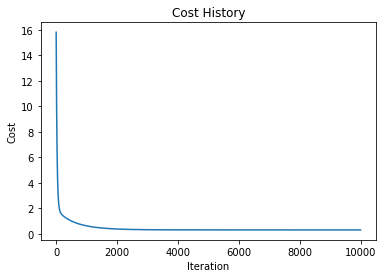

Train error rate: 0.5504200664658345
Test error rate: 0.6053660924842965


In [5]:
# Vanilia Gradient Descent Algorithms
def gradient_descent(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    
    # Initialize weights and bias
    w = np.zeros(num_features)
    b = 0
    cost_history = []
    
    for _ in range(num_iterations):
        # Calculate predictions
        y_pred = np.dot(X, w) + b
        
        # Calculate the difference between predictions and actual values
        error = y_pred - y
        
        # Calculate the gradient
        w_gradient = (1/num_samples) * np.dot(X.T, error)
        b_gradient = (1/num_samples) * np.sum(error)
        
        # Update theta using the learning rate and gradient
        w -= learning_rate * w_gradient
        b -= learning_rate * b_gradient
        
        # Calculate the cost (mean squared error)
        cost = np.mean(np.square(error))
        cost_history.append(cost)
    
    return w, b, cost_history

# Train the model using gradient descent
learning_rate = 0.01
num_iterations = 10000
w, b, cost_history = gradient_descent(X_train_normalized, y_train, learning_rate, num_iterations)

# Print the learned parameters
print("Learned parameters:")

for i, w_i in enumerate(w):
    print(f"w{i} =", w_i)
print("b =", b)

# Plot the cost history
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()

# Calculate train error rate
train_error_rate = calculate_error_rate(X_train_normalized,  y_train, w, b)
print("Train error rate:", train_error_rate)
    
# Calculate test error rate if test data is provided
if X_test is not None and y_test is not None:
    test_error_rate = calculate_error_rate(X_test_normalized, y_test, w, b)
    print("Test error rate:", test_error_rate)

Learned parameters:
w0 = 0.05991745486833127
w1 = -2.138096009922388
w2 = 3.845528762767929
b = 2.8660198487388913


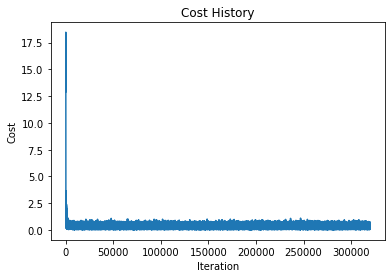

Train error rate: 0.5504233513770832
Test error rate: 0.6050116909077828


In [6]:
# Stochastic Gradien Descent Algorithms
def stochastic_gradient_descent(X, y, learning_rate, num_epochs, batch_size):
    num_samples, num_features = X.shape
    num_batches = num_samples // batch_size

    # Initialize weights and bias
    w = np.zeros(num_features)
    b = 0
    cost_history = []

    for epoch in range(num_epochs):
        # Shuffle the data for each epoch
        permutation = np.random.permutation(num_samples)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        for batch in range(num_batches):
            # Select the current batch
            start = batch * batch_size
            end = (batch + 1) * batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            # Calculate predictions
            y_pred = np.dot(X_batch, w) + b

            # Calculate the difference between predictions and actual values
            error = y_pred - y_batch

            # Calculate the gradients
            w_gradient = (1 / batch_size) * np.dot(X_batch.T, error)
            b_gradient = (1 / batch_size) * np.sum(error)

            # Update weights and bias
            w -= learning_rate * w_gradient
            b -= learning_rate * b_gradient

            # Calculate the cost (mean squared error)
            cost = np.mean(np.square(error))
            cost_history.append(cost)
            
    return w, b, cost_history

# Train the model using stochastic gradient descent
learning_rate = 0.01
num_epochs = 10000
batch_size = 10
w, b, cost_history = stochastic_gradient_descent(X_train_normalized, y_train, learning_rate, num_epochs, batch_size)

# Print the learned parameters
print("Learned parameters:")
for i, w_i in enumerate(w):
    print(f"w{i} =", w_i)
print("b =", b)

# Plot the cost history
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()

# Calculate train error rate
train_error_rate = calculate_error_rate(X_train_normalized,  y_train, w, b)
print("Train error rate:", train_error_rate)
    
# Calculate test error rate if test data is provided
if X_test is not None and y_test is not None:
    test_error_rate = calculate_error_rate(X_test_normalized, y_test, w, b)
    print("Test error rate:", test_error_rate)

Pytorch SGD

In [7]:
torch.manual_seed(42)

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.zeros(3, 1, # tensor size (3,1) for 3 variables and 1 output
                                               dtype=torch.float),
                                  requires_grad=True)  #we can update this value with gradient descent
        self.bias = nn.Parameter(torch.zeros(1,
                                            dtype=torch.float),
                                requires_grad=True)
    # Define one computation step as forward
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return torch.transpose(self.weights, 0, 1) * x + self.bias #regression formula

In [8]:
# Create instance of model
model_0 = LinearRegressionModel()

# Check nn.Parameters in the nn.Module subclass created
list(model_0.parameters())

[Parameter containing:
 tensor([[0.],
         [0.],
         [0.]], requires_grad=True),
 Parameter containing:
 tensor([0.], requires_grad=True)]

In [9]:
# Create loss function (Mean absolute error)
loss_fn = nn.MSELoss()

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), #parameters of target model to optimize
                           lr=0.01) #learning rate, how much optimizer should change the parameters each step

In [10]:
# ACTUAL TRAINING OF THE MODEL

torch.manual_seed(42)
# no. of times the model will pass over the training data
epochs = 100

# Create empty loss list to track loss values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### TRAINING!!!
    
    # Put model in training mode
    model_0.train()
    
    # 1. Forward pass on train data
    y_pred = model_0(X_train_tensor) # weight prediction
    # calculated index prediction
    index_pred = torch.sum(torch.mul(X_train_tensor, y_pred), dim=1) + model_0.bias #sum product of weight and data
        
    # 2. Calculate loss from prediction
    loss = loss_fn(index_pred.double(), y_train_tensor.double())
    
    # 3. Zero grad of optimizer
    optimizer.zero_grad()
    
    # 4. Loss backwards
    loss.backward()
    
    # 5. Progress the optimizer
    optimizer.step()
    
    ### TESTING ACCURACY!!!
    
    # Put model in evaluation mode
    model_0.eval()
    
    with torch.inference_mode():
        # 1. Forward pass on test data
        test_pred = model_0(X_test_tensor)
        
        # 2. Calculate loss on test data
        test_sum_prod = torch.sum(torch.mul(X_test_tensor, test_pred), dim=1) + model_0.bias
        test_loss = loss_fn(test_sum_prod, y_test_tensor)
        
        # Print out what is happening (each 10 steps)
        if epoch % 1 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
    
    

Epoch: 0 | MAE Train Loss: 15.80625 | MAE Test Loss: 12.244346394535613 
Epoch: 1 | MAE Train Loss: 12.097977166527667 | MAE Test Loss: 9.519757819975723 
Epoch: 2 | MAE Train Loss: 9.406777537929964 | MAE Test Loss: 7.5351409392734325 
Epoch: 3 | MAE Train Loss: 7.453224524927168 | MAE Test Loss: 6.088252695956648 
Epoch: 4 | MAE Train Loss: 6.034662509015179 | MAE Test Loss: 5.0322527097664445 
Epoch: 5 | MAE Train Loss: 5.0041140945370195 | MAE Test Loss: 4.2605070524628905 
Epoch: 6 | MAE Train Loss: 4.254983164151073 | MAE Test Loss: 3.695562027486068 
Epoch: 7 | MAE Train Loss: 3.7099594883252918 | MAE Test Loss: 3.2811466322701177 
Epoch: 8 | MAE Train Loss: 3.312974216251581 | MAE Test Loss: 2.976366017623884 
Epoch: 9 | MAE Train Loss: 3.0233621345906996 | MAE Test Loss: 2.7514914684639757 
Epoch: 10 | MAE Train Loss: 2.8116312264876924 | MAE Test Loss: 2.5849020034068486 
Epoch: 11 | MAE Train Loss: 2.656391563427617 | MAE Test Loss: 2.4608667622588927 
Epoch: 12 | MAE Train 

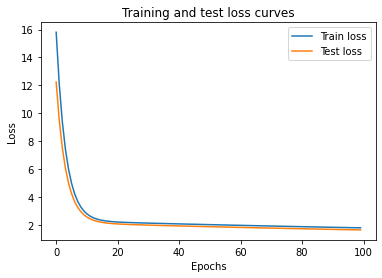

In [11]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [12]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([[-0.1530],
        [-0.2198],
        [ 0.5658]])), ('bias', tensor([1.3950]))])


Pytorch SGD Test (This is done by Chris for testing purpose)

Trained weights: tensor([ 0.0608, -2.1335,  3.8474], requires_grad=True)
Trained bias: tensor([2.8643], requires_grad=True)


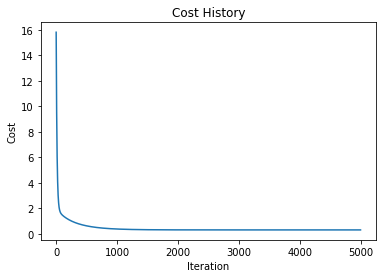

Train error rate: 0.5504200649769682
Test error rate: 0.6053662950911989


In [13]:
# Define the learning rate and number of epochs
learning_rate = 0.01
num_epochs = 5000

# Define the number of features
num_features = X_train_tensor.size()[1]

# Define the model parameters (weights and bias)
w = torch.zeros(num_features, dtype=torch.float, requires_grad=True)
b = torch.zeros(1, dtype=torch.float, requires_grad=True)
cost_history = []

# Define the loss function
criterion = torch.nn.MSELoss()

# Define the optimizer (Vanilla Gradient Descent)
optimizer = torch.optim.SGD([w, b], lr=learning_rate)

# Perform gradient descent
for epoch in range(num_epochs):
    # Forward pass
    outputs = torch.matmul(X_train_tensor.float(), w) + b
    loss = criterion(outputs, y_train_tensor.float())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record the loss
    cost_history.append(loss.detach().numpy())
    
#    # Print the loss every 10 epochs
#    if (epoch + 1) % 10 == 0:
#        print(f'Epoch [{epoch+1}], Loss: {loss.item():.8f}')
        

# Print learned parameters
print('Trained weights:', w)
print('Trained bias:', b)

# Plot the cost history
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()

# Calculate train error rate
train_error_rate = calculate_error_rate(X_train_normalized,  y_train, w.detach().numpy(), b.detach().numpy())
print("Train error rate:", train_error_rate)
    
# Calculate test error rate if test data is provided
if X_test is not None and y_test is not None:
    test_error_rate = calculate_error_rate(X_test_normalized, y_test, w.detach().numpy(), b.detach().numpy())
    print("Test error rate:", test_error_rate)

Neural Network

Epoch [10/5000], Loss: 20.31640816
Epoch [20/5000], Loss: 20.31640816
Epoch [30/5000], Loss: 20.31640816
Epoch [40/5000], Loss: 20.31640816
Epoch [50/5000], Loss: 20.31640816
Epoch [60/5000], Loss: 20.31640816
Epoch [70/5000], Loss: 20.31640816
Epoch [80/5000], Loss: 20.31640816
Epoch [90/5000], Loss: 20.31640816
Epoch [100/5000], Loss: 20.31640816
Epoch [110/5000], Loss: 20.31640816
Epoch [120/5000], Loss: 20.31640816
Epoch [130/5000], Loss: 20.31640816
Epoch [140/5000], Loss: 20.31640816
Epoch [150/5000], Loss: 20.31640816
Epoch [160/5000], Loss: 20.31640816
Epoch [170/5000], Loss: 20.31640816
Epoch [180/5000], Loss: 20.31640816
Epoch [190/5000], Loss: 20.31640816
Epoch [200/5000], Loss: 20.31640816
Epoch [210/5000], Loss: 20.31640816


C:\Users\chris\.julia\conda\3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([320])) that is different to the input size (torch.Size([320, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\chris\AppData\Local\Temp\ipykernel_19584\2400493343.py:22: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:491.)
  return loss

Epoch [220/5000], Loss: 20.31640816
Epoch [230/5000], Loss: 20.31640816
Epoch [240/5000], Loss: 20.31640816
Epoch [250/5000], Loss: 20.31640816
Epoch [260/5000], Loss: 20.31640816
Epoch [270/5000], Loss: 20.31640816
Epoch [280/5000], Loss: 20.31640816
Epoch [290/5000], Loss: 20.31640816
Epoch [300/5000], Loss: 20.31640816
Epoch [310/5000], Loss: 20.31640816
Epoch [320/5000], Loss: 20.31640816
Epoch [330/5000], Loss: 20.31640816
Epoch [340/5000], Loss: 20.31640816
Epoch [350/5000], Loss: 20.31640816
Epoch [360/5000], Loss: 20.31640816
Epoch [370/5000], Loss: 20.31640816
Epoch [380/5000], Loss: 20.31640816
Epoch [390/5000], Loss: 20.31640816
Epoch [400/5000], Loss: 20.31640816
Epoch [410/5000], Loss: 20.31640816
Epoch [420/5000], Loss: 20.31640816
Epoch [430/5000], Loss: 20.31640816
Epoch [440/5000], Loss: 20.31640816
Epoch [450/5000], Loss: 20.31640816
Epoch [460/5000], Loss: 20.31640816
Epoch [470/5000], Loss: 20.31640816
Epoch [480/5000], Loss: 20.31640816
Epoch [490/5000], Loss: 20.3

Epoch [2500/5000], Loss: 20.31640816
Epoch [2510/5000], Loss: 20.31640816
Epoch [2520/5000], Loss: 20.31640816
Epoch [2530/5000], Loss: 20.31640816
Epoch [2540/5000], Loss: 20.31640816
Epoch [2550/5000], Loss: 20.31640816
Epoch [2560/5000], Loss: 20.31640816
Epoch [2570/5000], Loss: 20.31640816
Epoch [2580/5000], Loss: 20.31640816
Epoch [2590/5000], Loss: 20.31640816
Epoch [2600/5000], Loss: 20.31640816
Epoch [2610/5000], Loss: 20.31640816
Epoch [2620/5000], Loss: 20.31640816
Epoch [2630/5000], Loss: 20.31640816
Epoch [2640/5000], Loss: 20.31640816
Epoch [2650/5000], Loss: 20.31640816
Epoch [2660/5000], Loss: 20.31640816
Epoch [2670/5000], Loss: 20.31640816
Epoch [2680/5000], Loss: 20.31640816
Epoch [2690/5000], Loss: 20.31640816
Epoch [2700/5000], Loss: 20.31640816
Epoch [2710/5000], Loss: 20.31640816
Epoch [2720/5000], Loss: 20.31640816
Epoch [2730/5000], Loss: 20.31640816
Epoch [2740/5000], Loss: 20.31640816
Epoch [2750/5000], Loss: 20.31640816
Epoch [2760/5000], Loss: 20.31640816
E

Epoch [4780/5000], Loss: 20.31640816
Epoch [4790/5000], Loss: 20.31640816
Epoch [4800/5000], Loss: 20.31640816
Epoch [4810/5000], Loss: 20.31640816
Epoch [4820/5000], Loss: 20.31640816
Epoch [4830/5000], Loss: 20.31640816
Epoch [4840/5000], Loss: 20.31640816
Epoch [4850/5000], Loss: 20.31640816
Epoch [4860/5000], Loss: 20.31640816
Epoch [4870/5000], Loss: 20.31640816
Epoch [4880/5000], Loss: 20.31640816
Epoch [4890/5000], Loss: 20.31640816
Epoch [4900/5000], Loss: 20.31640816
Epoch [4910/5000], Loss: 20.31640816
Epoch [4920/5000], Loss: 20.31640816
Epoch [4930/5000], Loss: 20.31640816
Epoch [4940/5000], Loss: 20.31640816
Epoch [4950/5000], Loss: 20.31640816
Epoch [4960/5000], Loss: 20.31640816
Epoch [4970/5000], Loss: 20.31640816
Epoch [4980/5000], Loss: 20.31640816
Epoch [4990/5000], Loss: 20.31640816
Epoch [5000/5000], Loss: 20.31640816
input_layer.weight: tensor([[ 0.4414,  0.4792, -0.1353],
        [ 0.5304, -0.1265,  0.1165],
        [-0.2811,  0.3391,  0.5090],
        [-0.4236, 

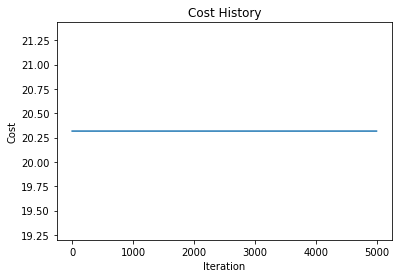

In [14]:
# Define a custom neural network class
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(NeuralNetwork, self).__init__()
        
        # Intialize the input, the hidden, and the output layer
        self.input_layer = nn.Linear(input_size, hidden_sizes[0])
        self.hidden_layers = nn.ModuleList()
        for i in range(len(hidden_sizes) - 1):
            self.hidden_layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)
    
    def forward_propagation(self, x):
        x = torch.relu(self.input_layer(x))
        for hidden_layer in self.hidden_layers:
            x = torch.relu(hidden_layer(x))
        x = self.output_layer(x)
        return x
    
    def backward_propagation(self, loss):
        loss.sum().backward()
        return loss.grad
    
# Define the learning rate and number of epochs
learning_rate = 0.01
num_epochs = 5000

# Define the number of features
num_features = X_train_tensor.size()[1]

# Define the model parameters
input_size = num_features
hidden_size = [5]
output_size = 1
w = torch.zeros(torch.Size([input_size] + hidden_size + [output_size]), dtype=torch.float, requires_grad=True)
b = torch.zeros(1, dtype=torch.float, requires_grad=True)
cost_history = []

# Create an instance of the neural network
criterion = nn.MSELoss()
NeuralNetwork_model = NeuralNetwork(input_size, hidden_size, output_size)
optimizer = torch.optim.SGD([w, b], lr=learning_rate)

# Perform training
for epoch in range(num_epochs):
    # Forward propagation to obtain the predicted output
    outputs = NeuralNetwork_model.forward_propagation(X_train_tensor.float())
    
    # Calculate the loss
    loss = criterion(outputs, y_train_tensor.float())
    
    # Backward pass and optimization
    loss_derivative = NeuralNetwork_model.backward_propagation(loss)
    
    # Update the weights and biases
    optimizer.step()
    
    # Record the loss
    cost_history.append(loss.item())
    
    # Print the loss every 100 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}')
        
# Print learned parameters
for name, param in NeuralNetwork_model.named_parameters():
    if param.requires_grad:
        print(f'{name}: {param.data}')
        
# Plot the cost history
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()

# Error rate analysis function for neural network

# Calculate train error rate
#train_error_rate = calculate_error_rate(X_train_normalized,  y_train, w, b)
#print("Train error rate:", train_error_rate)
    
# Calculate test error rate if test data is provided
#if X_test is not None and y_test is not None:
#    test_error_rate = calculate_error_rate(X_test_normalized, y_test, w, b)
#    print("Test error rate:", test_error_rate)